In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
data=pd.read_csv("/content/drive/MyDrive/Class work/Fall 2022/Big data/house_rent.csv")

In [123]:

for i in data.columns:
  print(i,data[i].isnull().sum())


title 0
location 0
type 0
bed 0
bath 0
area 0
price 0


In [124]:
number_of_comma=data["location"].str.count(',')
number_of_comma.head()

0    2
1    3
2    2
3    3
4    1
Name: location, dtype: int64

In [125]:
print(number_of_comma.value_counts())

2    6683
3    3301
1    2613
4     897
5      79
0      22
Name: location, dtype: int64


In [126]:
data_modify=data

In [127]:
address=pd.DataFrame([ x.rsplit(',',1) for x in data['location'].tolist()])
district=[]
for index in range(len(address)):
    value=address.iloc[index]
    if value[1]==None:
        district.append(value[0])
        address[0].iloc[index]='Blank'
        address[1].iloc[index]=value[0]
    elif value[0]==None:
        district.append(None)
    else:
        district.append(value[1])
             
district=[i.strip() for i in district]

In [128]:
#finding None value in distric
count=0     
for x in address[0]:
    if x=="Blank":
        count+=1
print(count)

22


In [129]:
address=pd.DataFrame([ x.rsplit(',',1) for x in address[0].tolist()])
address

,0,1
0,Sector 10,Uttara
1,"Satarkul, Uttar Badda",Badda
2,Sector 7,Uttara
3,"Satarkul, Uttar Badda",Badda
4,15 No. Bagmoniram Ward,None
...,...,...
13590,15 No. Bagmoniram Ward,None
13591,Block G,Bashundhara R-A
13592,Bayazid,None
13593,"Block C1, Sector 15",Uttara


In [130]:

upazila=[]
for index in range(len(address)):
    value=address.iloc[index]
    if value[1]==None:
        upazila.append(value[0])
        address[0].iloc[index]='Blank'
        address[1].iloc[index]=value[0]
    elif value[0]==None:
        upazila.append(None)
    else:
        upazila.append(value[1])
upazila=[i.strip() for i in upazila]
upazila[1:10]


['Badda',
 'Uttara',
 'Badda',
 '15 No. Bagmoniram Ward',
 'Mohammadpur',
 'Mohammadpur',
 'Mirpur',
 'Uttara',
 'Bashundhara R-A']

In [131]:
#finding None value in distric
count=0     
for x in upazila:
    if x=="Blank":
        count+=1
print(count)

22


In [132]:
address=pd.DataFrame([ x.rsplit(',',1) for x in address[0].tolist()])
address

,0,1
0,Sector 10,None
1,Satarkul,Uttar Badda
2,Sector 7,None
3,Satarkul,Uttar Badda
4,Blank,None
...,...,...
13590,Blank,None
13591,Block G,None
13592,Blank,None
13593,Block C1,Sector 15


In [133]:

suburbs=[]
for index in range(len(address)):
    value=address.iloc[index]
    if value[1]==None:
        suburbs.append(value[0])
        address[0].iloc[index]='Blank'
        address[1].iloc[index]=value[0]
    elif value[0]==None:
        suburbs.append(None)
    else:
        suburbs.append(value[1])
suburbs=[i.strip() for i in suburbs]
suburbs[1:10]


['Uttar Badda',
 'Sector 7',
 'Uttar Badda',
 'Blank',
 'PC Culture Housing',
 'PC Culture Housing',
 'East Shewrapara',
 'Sector 14',
 'Block D']

In [134]:
#finding None value in distric
count=0     
for x in suburbs:
    if x=="Blank":
        count+=1
print(count)

2635


In [135]:
import collections
from collections import Counter

print(len(district))
print(len(upazila))
print(len(suburbs))
data.shape


13595
13595
13595


(13595, 7)

In [136]:
# data_modify['district','upazila','suburbs']=[district,upazila,suburbs]
data_modify['district']=district
data_modify['upazila']=upazila
data_modify['suburbs']=suburbs


In [137]:
data_modify.head(3)

,title,location,type,bed,bath,area,price,district,upazila,suburbs
0,A Full Furnished Apartment Is Up For Rent In U...,"Sector 10, Uttara, Dhaka",Apartment,4,5,"3,000 sqft",65 Thousand,Dhaka,Uttara,Sector 10
1,We Have A 1250 Sq. ft Flat For Rent In Satarkul,"Satarkul, Uttar Badda, Badda, Dhaka",Apartment,3,3,"1,250 sqft",18.5 Thousand,Dhaka,Badda,Uttar Badda
2,"In A Mind-blowing Location Of Uttara Sec- 7, 2...","Sector 7, Uttara, Dhaka",Apartment,4,4,"2,600 sqft",75 Thousand,Dhaka,Uttara,Sector 7


In [138]:
area=data_modify['area']

In [139]:
area=area.replace(',','', regex=True)
area=area.replace(' sqft','', regex=True)
area=[int(i) for i in area]

In [140]:
data_modify['area']=area
data_modify.head(3)

,title,location,type,bed,bath,area,price,district,upazila,suburbs
0,A Full Furnished Apartment Is Up For Rent In U...,"Sector 10, Uttara, Dhaka",Apartment,4,5,3000,65 Thousand,Dhaka,Uttara,Sector 10
1,We Have A 1250 Sq. ft Flat For Rent In Satarkul,"Satarkul, Uttar Badda, Badda, Dhaka",Apartment,3,3,1250,18.5 Thousand,Dhaka,Badda,Uttar Badda
2,"In A Mind-blowing Location Of Uttara Sec- 7, 2...","Sector 7, Uttara, Dhaka",Apartment,4,4,2600,75 Thousand,Dhaka,Uttara,Sector 7


In [141]:
print(type(int(area[0])))

<class 'int'>


In [142]:
from re import search
price=[]
for x in data['price']:
    if search("Thousand",x):
        x=x.replace('Thousand','').strip()
        x=x.strip()
        num=float(x)
        price.append(num)
    elif search("Lakh",x):
        x=x.replace('Lakh','')
        x=x.strip()
        num=float(x)*100
        price.append(num)


In [143]:
data_modify['price']=price

In [144]:
data_modify.head(5)

,title,location,type,bed,bath,area,price,district,upazila,suburbs
0,A Full Furnished Apartment Is Up For Rent In U...,"Sector 10, Uttara, Dhaka",Apartment,4,5,3000,65.0,Dhaka,Uttara,Sector 10
1,We Have A 1250 Sq. ft Flat For Rent In Satarkul,"Satarkul, Uttar Badda, Badda, Dhaka",Apartment,3,3,1250,18.5,Dhaka,Badda,Uttar Badda
2,"In A Mind-blowing Location Of Uttara Sec- 7, 2...","Sector 7, Uttara, Dhaka",Apartment,4,4,2600,75.0,Dhaka,Uttara,Sector 7
3,Offering You Beautiful 1000 Sq Ft Apartment To...,"Satarkul, Uttar Badda, Badda, Dhaka",Apartment,3,3,1000,17.0,Dhaka,Badda,Uttar Badda
4,Check This 1450 Sq Ft Apartment Up For Rent At...,"15 No. Bagmoniram Ward, Chattogram",Apartment,3,3,1450,25.0,Chattogram,15 No. Bagmoniram Ward,Blank


In [145]:
frequency = collections.Counter(data_modify['type'])

print(dict(frequency))

{'Apartment': 13520, 'Duplex': 54, 'Building': 21}


In [146]:
data_modify.drop(['title','location'],axis=1)

,type,bed,bath,area,price,district,upazila,suburbs
0,Apartment,4,5,3000,65.0,Dhaka,Uttara,Sector 10
1,Apartment,3,3,1250,18.5,Dhaka,Badda,Uttar Badda
2,Apartment,4,4,2600,75.0,Dhaka,Uttara,Sector 7
3,Apartment,3,3,1000,17.0,Dhaka,Badda,Uttar Badda
4,Apartment,3,3,1450,25.0,Chattogram,15 No. Bagmoniram Ward,Blank
...,...,...,...,...,...,...,...,...
13590,Apartment,3,4,1600,27.0,Chattogram,15 No. Bagmoniram Ward,Blank
13591,Apartment,2,2,800,16.0,Dhaka,Bashundhara R-A,Block G
13592,Apartment,2,2,800,11.5,Chattogram,Bayazid,Blank
13593,Apartment,2,2,900,13.0,Dhaka,Uttara,Sector 15


In [147]:
df = data_modify[data_modify["district"].str.contains("Blank") == False]
df.shape

(13595, 10)

In [148]:
df = data_modify[data_modify["upazila"].str.contains("Blank") == False]
df.shape

(13573, 10)

In [149]:
df = data_modify[data_modify["suburbs"].str.contains("Blank") == False]
df.shape

(10960, 10)

In [150]:
data_modify=df
data_modify.shape

(10960, 10)

In [151]:
data_modify.isnull().sum()

title       0
location    0
type        0
bed         0
bath        0
area        0
price       0
district    0
upazila     0
suburbs     0
dtype: int64

In [152]:
data_modify.columns

Index(['title', 'location', 'type', 'bed', 'bath', 'area', 'price', 'district',
       'upazila', 'suburbs'],
      dtype='object')

In [153]:
data_modify.dtypes

title        object
location     object
type         object
bed           int64
bath          int64
area          int64
price       float64
district     object
upazila      object
suburbs      object
dtype: object

In [154]:
data_modify=data_modify.drop(['title'],axis=1)
data_modify=data_modify.drop(['location'],axis=1)

In [155]:
data_modify.dtypes

type         object
bed           int64
bath          int64
area          int64
price       float64
district     object
upazila      object
suburbs      object
dtype: object

#Data Visualization

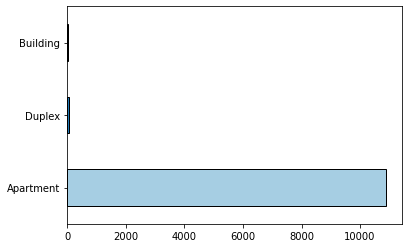

In [156]:
col_map = plt.get_cmap('Paired')
data_modify['type'].value_counts().plot(kind='barh',color=col_map.colors, edgecolor='k', 
        linewidth=1)

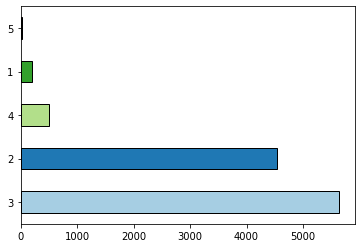

In [157]:
# data_modify['bed'].value_counts()[:20].plot(kind='barh')
data_modify.loc[data_modify['type']=="Apartment"]['bed'].value_counts().plot(kind='barh',color=col_map.colors, edgecolor='k', 
        linewidth=1)


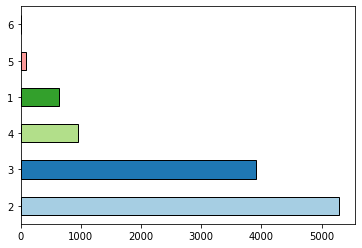

In [158]:
data_modify.loc[data_modify['type']=="Apartment"]['bath'].value_counts()[:20].plot(kind='barh',color=col_map.colors, edgecolor='k', 
        linewidth=1)

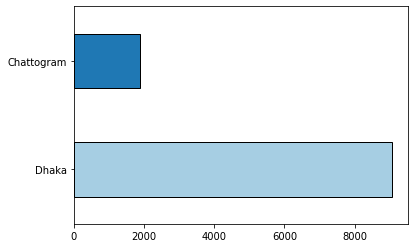

In [159]:
data_modify['district'].value_counts().plot(kind='barh',color=col_map.colors, edgecolor='k', 
        linewidth=1)

#Encoding

In [160]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_modify["type"]= label_encoder.fit_transform(data_modify["type"])
data_modify["district"]= label_encoder.fit_transform(data_modify["district"])
data_modify["upazila"]= label_encoder.fit_transform(data_modify["upazila"])
data_modify["suburbs"]= label_encoder.fit_transform(data_modify["suburbs"])
  


In [161]:
data_modify['price'].describe()

count    10960.000000
mean        24.550017
std         38.758328
min          5.500000
25%         13.000000
50%         16.500000
75%         23.000000
max       1460.000000
Name: price, dtype: float64

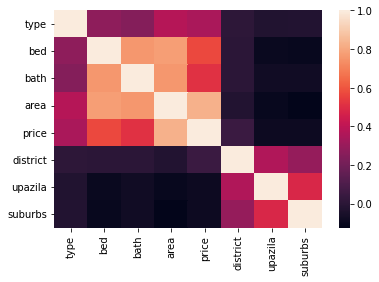

In [162]:
import seaborn as sns
sns.heatmap(data_modify.corr())

In [163]:
data_modify.dtypes

type          int64
bed           int64
bath          int64
area          int64
price       float64
district      int64
upazila       int64
suburbs       int64
dtype: object

In [164]:
data_modify.head(5)

,type,bed,bath,area,price,district,upazila,suburbs
0,0,4,5,3000,65.0,1,68,241
1,0,3,3,1250,18.5,1,13,282
2,0,4,4,2600,75.0,1,68,252
3,0,3,3,1000,17.0,1,13,282
5,0,3,2,900,16.0,1,49,204


In [165]:
# from sklearn.preprocessing import minmax_scale

# data_modify["price"] = minmax_scale(data_modify["price"])
# data_modify["area"] = minmax_scale(data_modify["area"])

In [166]:
# sns.pairplot(data_modify)

testing

In [167]:
# data_modify = data_modify.drop_duplicates(keep='first')
# data_modify.shape
# data_modify=data_modify.drop(['bath','upazila'],axis=1)

In [168]:
from sklearn.model_selection import train_test_split
X=data_modify.drop('price',axis=1)
y=data_modify['price']
# Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
lm=LinearRegression()

In [171]:
lm.fit(X_train, y_train)

LinearRegression()

In [172]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
type,6.355022
bed,-4.069862
bath,-12.600231
area,0.059311
district,8.957469
upazila,-0.093690
suburbs,0.007813


In [173]:
LinearRegression_predictions = lm.predict(X_test)  

In [174]:
from sklearn import metrics
metrics.r2_score(y_test,LinearRegression_predictions)

0.696411454972087

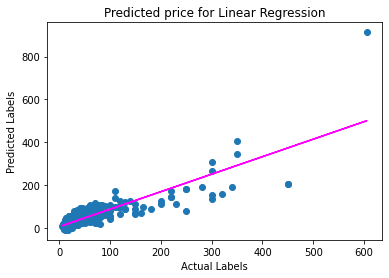

In [175]:
plt.scatter(y_test, LinearRegression_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted price for Linear Regression')

# overlaying the regression line
z = np.polyfit(y_test, LinearRegression_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [176]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(X_train, y_train)
GB_predictions = model.predict(X_test)
metrics.r2_score(y_test, GB_predictions)


0.8677650109559476

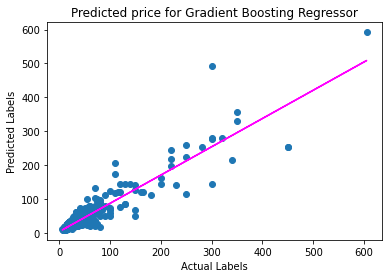

In [177]:
plt.scatter(y_test, GB_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted price for Gradient Boosting Regressor')

# overlay the regression line
z = np.polyfit(y_test, GB_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [178]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
SVR_model=regressor.fit(X_train, y_train)

In [179]:
SVR_predictions = SVR_model.predict(X_test)
metrics.r2_score(y_test, SVR_predictions)

0.4532277703922387

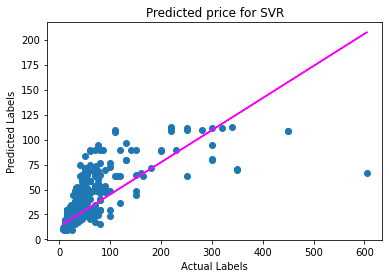

In [180]:
plt.scatter(y_test, SVR_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted price for SVR')

# overlay the regression line
z = np.polyfit(y_test, SVR_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [181]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)
lasso_predictions = lasso_model.predict(X_test)
metrics.r2_score(y_test, lasso_predictions)

0.6963574606891945

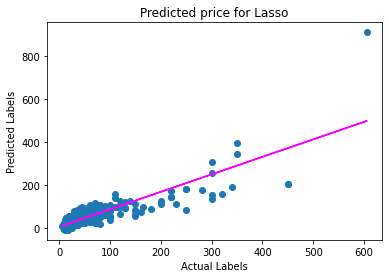

In [182]:
plt.scatter(y_test, lasso_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted price for Lasso')

# overlay the regression line
z = np.polyfit(y_test, lasso_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [183]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

In [184]:
print(metrics.r2_score(y_test,LinearRegression_predictions))
print(mean_absolute_error(y_test, LinearRegression_predictions))
print(mean_squared_error(y_test, LinearRegression_predictions))
print(sqrt(mean_squared_error(y_test, LinearRegression_predictions)))

0.696411454972087
9.879555433775138
342.2916758138678
18.50112633906022


In [185]:
print(metrics.r2_score(y_test,GB_predictions))
print(mean_absolute_error(y_test, GB_predictions))
print(mean_squared_error(y_test, GB_predictions))
print(sqrt(mean_squared_error(y_test, GB_predictions)))

0.8677650109559476
4.463706510144355
149.09302983403256
12.210365671593646


In [186]:
print(metrics.r2_score(y_test,SVR_predictions))
print(mean_absolute_error(y_test, SVR_predictions))
print(mean_squared_error(y_test, SVR_predictions))
print(sqrt(mean_squared_error(y_test, SVR_predictions)))

0.4532277703922387
6.667842161592151
616.4777486703848
24.82896994783281


In [187]:
print(metrics.r2_score(y_test,lasso_predictions))
print(mean_absolute_error(y_test, lasso_predictions))
print(mean_squared_error(y_test, lasso_predictions))
print(sqrt(mean_squared_error(y_test, lasso_predictions)))

0.6963574606891945
9.928831323846403
342.3525535837256
18.50277151087711


In [188]:
models=['Linear Regression','Gradient Boosting','SVR','LASSO Regression']
r2Score=[metrics.r2_score(y_test,LinearRegression_predictions),
         metrics.r2_score(y_test,GB_predictions),
         metrics.r2_score(y_test,SVR_predictions),
         metrics.r2_score(y_test,lasso_predictions)]
rmse=[sqrt(mean_squared_error(y_test, LinearRegression_predictions)),
      sqrt(mean_squared_error(y_test, GB_predictions)),
      sqrt(mean_squared_error(y_test, SVR_predictions)),
      sqrt(mean_squared_error(y_test, lasso_predictions))]


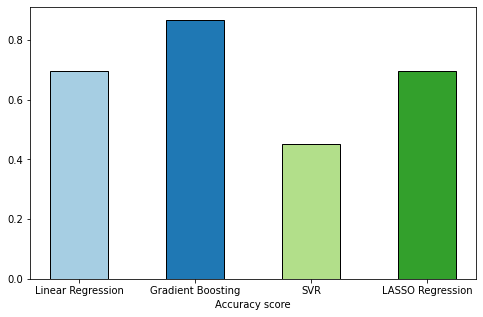

In [189]:
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(models, r2Score, width=.5,color=col_map.colors, edgecolor='k', 
        linewidth=1)
 
plt.xlabel("Accuracy score")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
plt.show()

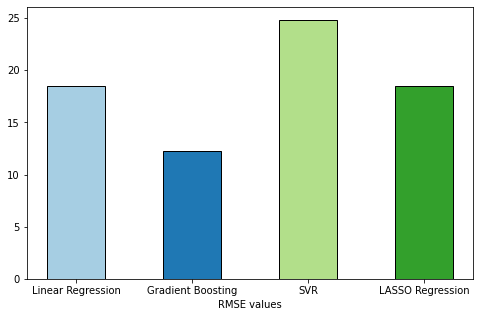

In [190]:
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(models, rmse, width=.5,color=col_map.colors, edgecolor='k', 
        linewidth=1)
 
plt.xlabel("RMSE values")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
plt.show()